In [1]:
# Import all the functions you need
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
from pathlib import Path
import os

# Comment here to add in for either mac or linux computer
# sys.path.extend(['/Users/nkinsky/Documents/UM/GitHub/NeuroPy'])  # For mac laptop
sys.path.extend(['/data/GitHub/NeuroPy'])  # for linux

from neuropy import core
from neuropy.io import (optitrackio,
                        dlcio,
                        )
from neuropy.io.neuroscopeio import NeuroscopeIO
from neuropy.io.binarysignalio import BinarysignalIO 
from neuropy.io.miniscopeio import MiniscopeIO
from neuropy.utils.miniscope_denoise import plot_miniscope_noise, check_filter

In [2]:
# Enter dat filename to use here
dat_filename = 'Boba_habituation1_w_noise.dat'

## Before Denoising

<IPython.core.display.Javascript object>


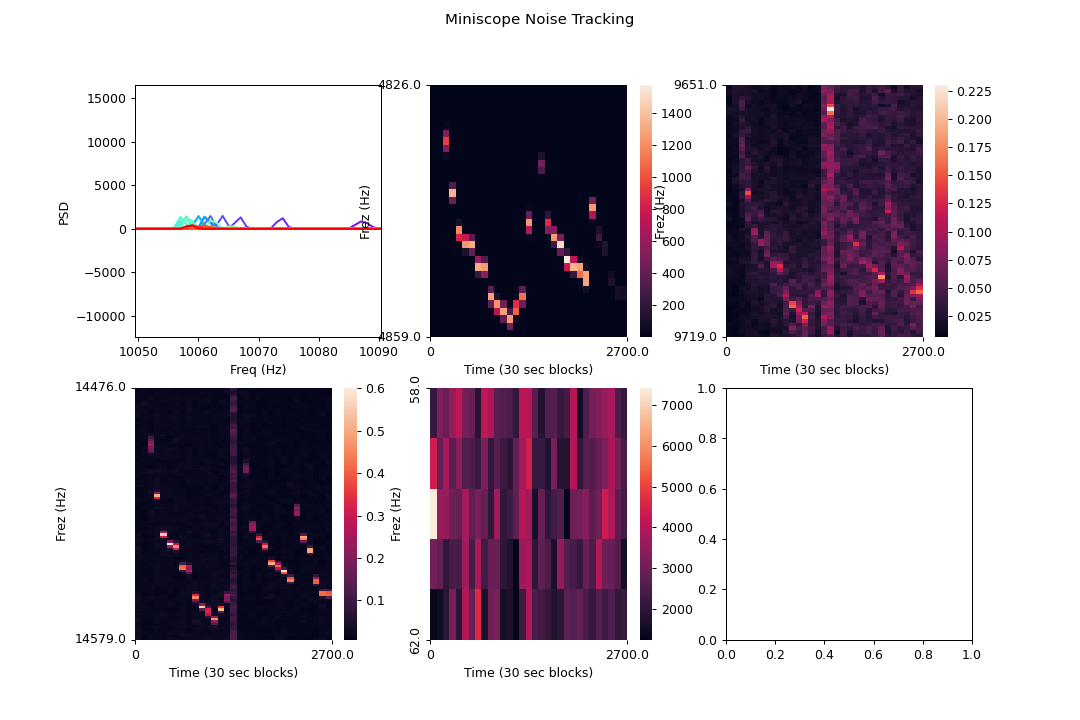

<IPython.core.display.Javascript object>


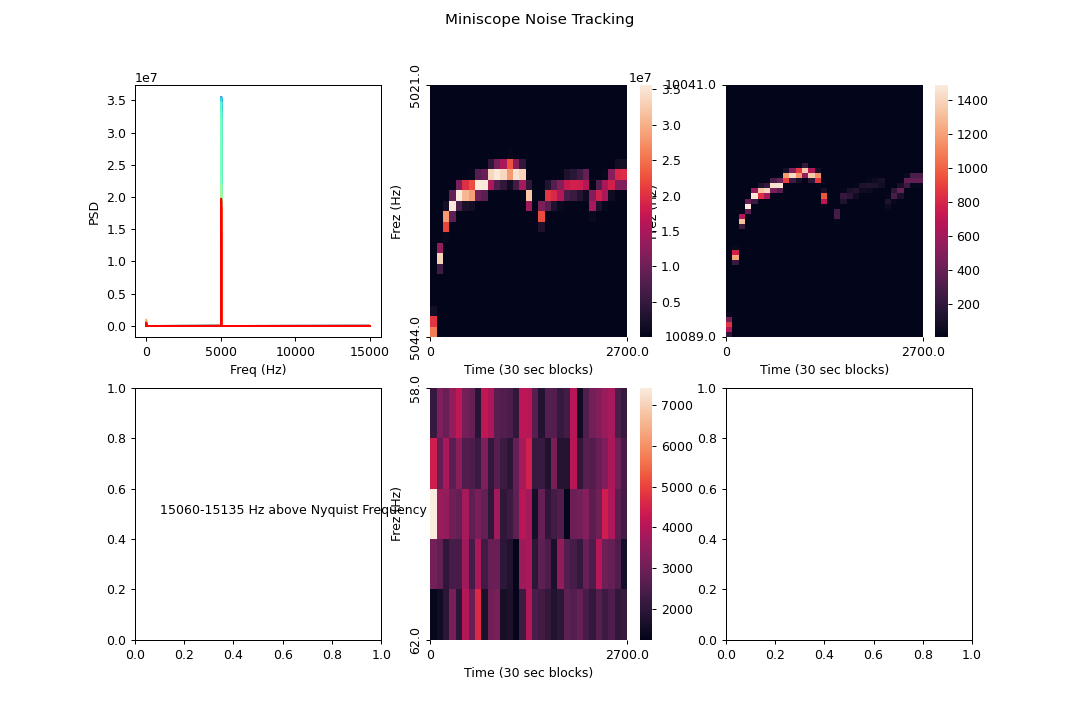

In [25]:
%matplotlib notebook
datfile = BinarysignalIO(Path(os.getcwd()) / dat_filename,
                         n_channels=35, sampling_rate=30000)

signal = datfile.get_signal()
f_full, Pxx_full = plot_miniscope_noise(signal, 23, interval_sec=90, remove_disconnects=True,
                                        EWLnoise_range=(4825, 4860))

f_full, Pxx_full = plot_miniscope_noise(signal, 23, interval_sec=90, remove_disconnects=True,
                                        EWLnoise_range=(5020, 5045))


In [4]:
14910/3

4970.0

Yikes. A lot of noise.

## Perform Denoising

Check filter before running. Make sure filter values in rightmost plot are all negative. Any positive values will result in total devastation of your .dat file.

<IPython.core.display.Javascript object>


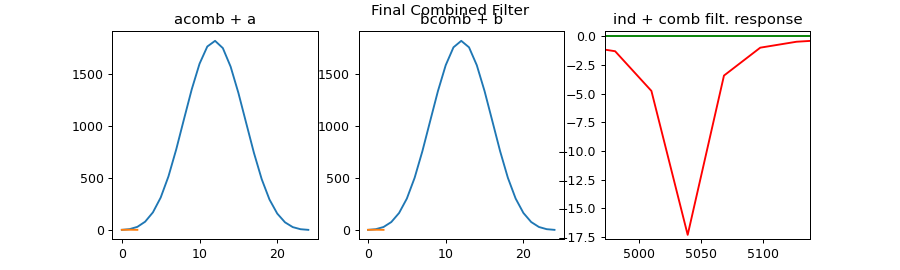

In [30]:
%matplotlib notebook
sys.path.extend(['/data/GitHub/spyking-circus/'])  # for linux
from circus.filtering import miniscope_filter
dat_file = str(Path(os.getcwd()) / dat_filename)

# Round1 with all combined
base_freq = 5028
base_freq2 = 5045
base_freq3 = 4845
base_freq4 = 4855
base_freq5 = 4815
notch_filter = [
            {"w0": base_freq, "bw": 40, "Q": None},
            {"w0": 2 * base_freq, "bw": 40, "Q": None},
            {"w0": base_freq2, "bw": 40, "Q": None},
            {"w0": 2 * base_freq2, "bw": 40, "Q": None},
            {"w0": base_freq3, "bw": 40, "Q": None},
            {"w0": 2 * base_freq3, "bw": 40, "Q": None},
            {"w0": 3 * base_freq3, "bw": 40, "Q": None},
            {"w0": base_freq4, "bw": 40, "Q": None},
            {"w0": 2 * base_freq4, "bw": 40, "Q": None},
            {"w0": 3 * base_freq4, "bw": 40, "Q": None},
            {"w0": 14870, "bw": 60, "Q": None},           
            {"w0": 14910, "bw": 60, "Q": None},
]

check_filter(notch_filter)

In [28]:
miniscope_filter(dat_file, top_limit=0, notch_filter=notch_filter)

STARTING MINISCOPE DE-NOISING
padding_sec changed to 1 for notch filter
Filtering with pre-specified notch filter


100%|████████████████████████████████████|[06:49<00:00,  4.32s/it]


DAT FILE DE-NOISING FINISHED


## After Denoising

<IPython.core.display.Javascript object>


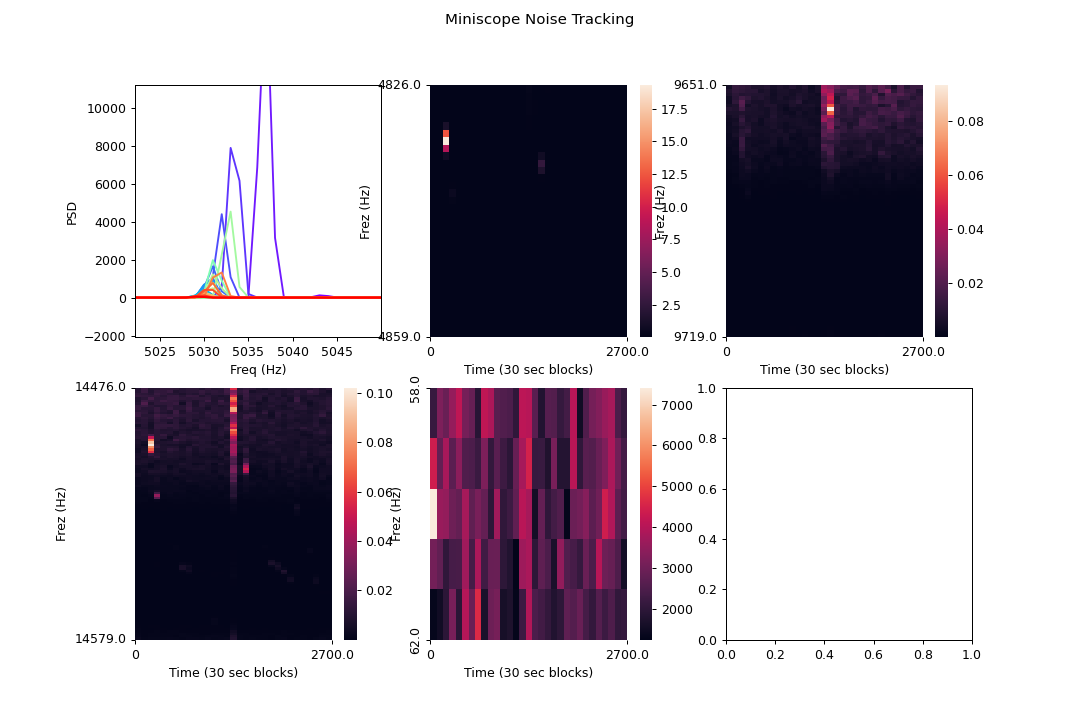

<IPython.core.display.Javascript object>


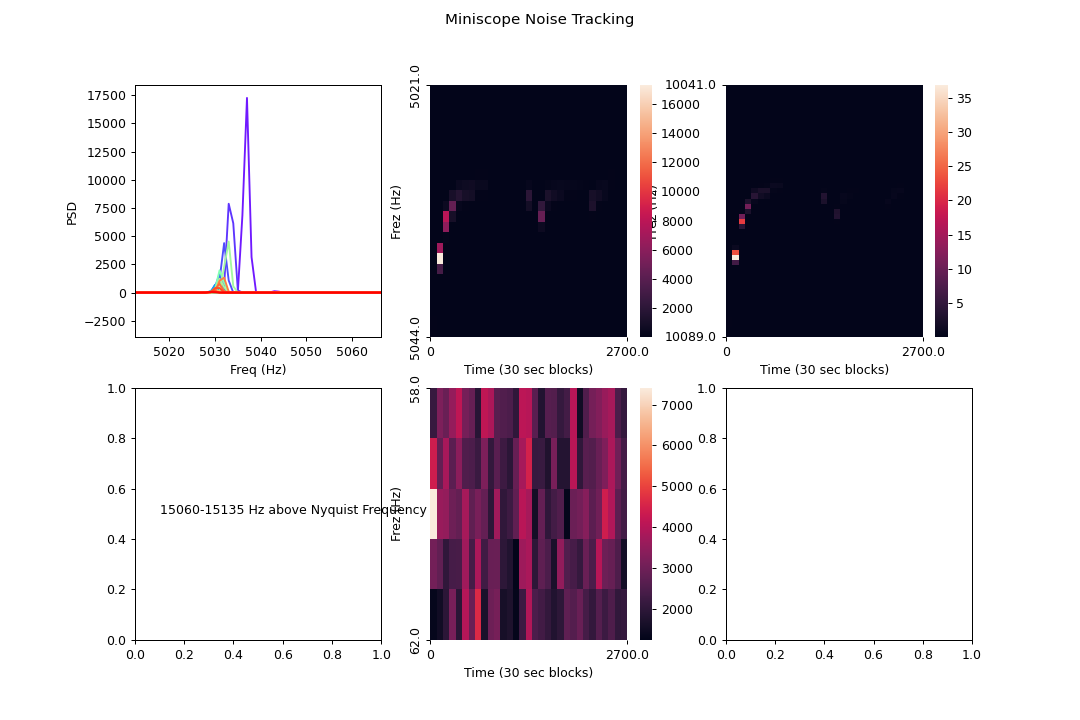

In [29]:
%matplotlib notebook
datfile = BinarysignalIO(Path(os.getcwd()) / dat_filename,
                         n_channels=35, sampling_rate=30000)

signal = datfile.get_signal()
f_full, Pxx_full = plot_miniscope_noise(signal, 23, interval_sec=90, remove_disconnects=True,
                                        EWLnoise_range=(4825, 4860))

f_full, Pxx_full = plot_miniscope_noise(signal, 23, interval_sec=90, remove_disconnects=True,
                                        EWLnoise_range=(5020, 5045))

Seems like some noise is left centered at ~5031Hz. Try to re-run to get rid of.

<IPython.core.display.Javascript object>


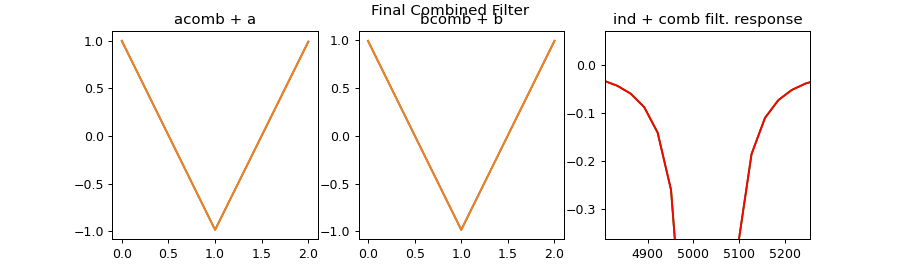

In [31]:
notch_filter = [
            {"w0": 5031, "bw": 40, "Q": None},
            
]
check_filter(notch_filter)

In [33]:
miniscope_filter(dat_file, top_limit=0, notch_filter=notch_filter)

STARTING MINISCOPE DE-NOISING
padding_sec changed to 1 for notch filter
Filtering with pre-specified notch filter


100%|████████████████████████████████████|[04:11<00:00,  2.65s/it]


DAT FILE DE-NOISING FINISHED


<IPython.core.display.Javascript object>


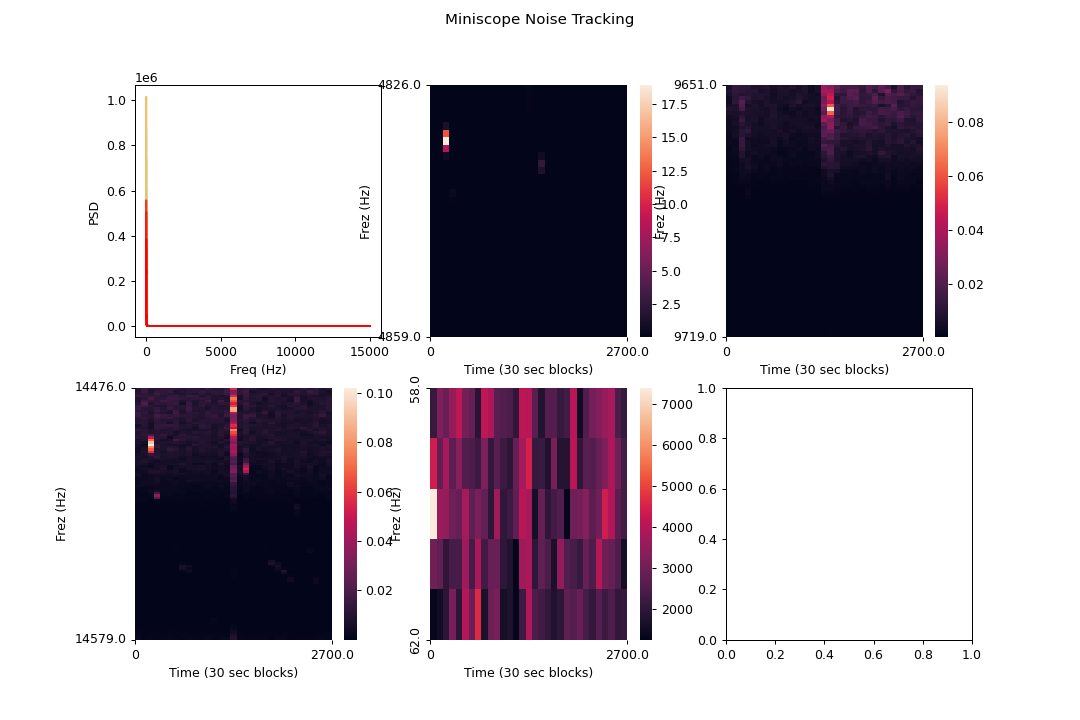

<IPython.core.display.Javascript object>


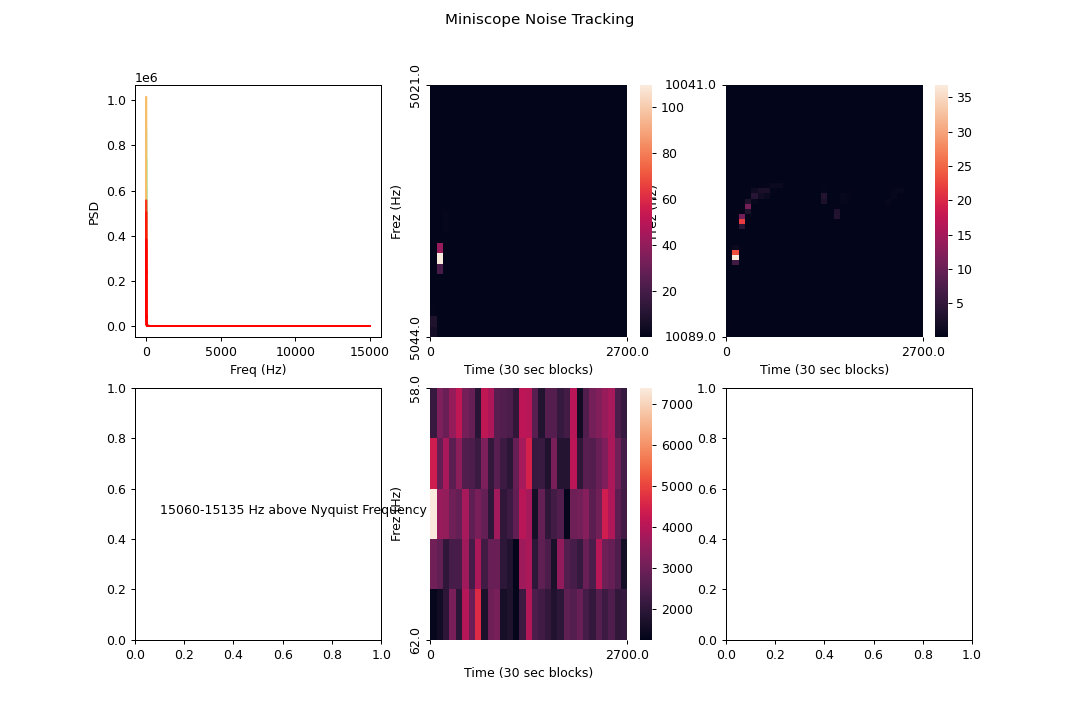

In [34]:
%matplotlib notebook
datfile = BinarysignalIO(Path(os.getcwd()) / dat_filename,
                         n_channels=35, sampling_rate=30000)

signal = datfile.get_signal()
f_full, Pxx_full = plot_miniscope_noise(signal, 23, interval_sec=90, remove_disconnects=True,
                                        EWLnoise_range=(4825, 4860))

f_full, Pxx_full = plot_miniscope_noise(signal, 23, interval_sec=90, remove_disconnects=True,
                                        EWLnoise_range=(5020, 5045))

Looks great!